In [98]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.kernel_ridge import KernelRidge

# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet


# miscellaneous
import scipy.stats as ss




In [99]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
from matplotlib import style
import seaborn as sns
#import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
#% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [100]:
df = pd.read_csv('../data/train_bike.csv', parse_dates=True)
#df.datetime = pd.to_datetime(df.datetime, infer_datetime_format=True)
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [101]:
start_features = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
test_features = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

### Interesting but to much time

In [102]:
#from pandas_profiling import ProfileReport

#ProfileReport= ProfileReport(df , title ='pandas profiling report')

#ProfileReport



In [103]:


df.describe().T



,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [104]:
def convert_date(dft):
    
    
    dft['datetime'] = pd.to_datetime(dft['datetime'])
    dft['month'] = dft['datetime'].dt.month
    dft['hour'] = dft['datetime'].dt.hour
    dft['weekday'] = dft['datetime'].dt.dayofweek
    dft["day"]=dft["datetime"].dt.day
    dft["year"]=dft["datetime"].dt.year
    dft['dayofweek'] = dft['datetime'].dt.dayofweek
    dft['month_start'] = dft['datetime'].dt.is_month_start
    dft['woy'] = dft['datetime'].dt.isocalendar().week.astype(int)
    
    return dft

df_new = convert_date(df)
df_new.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,day,year,dayofweek,month_start,woy
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5,1,2011,5,True,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,1,2011,5,True,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,5,1,2011,5,True,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,5,1,2011,5,True,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,5,1,2011,5,True,52


Text(0.5, 1.0, 'Box plot on Count on Humidity')

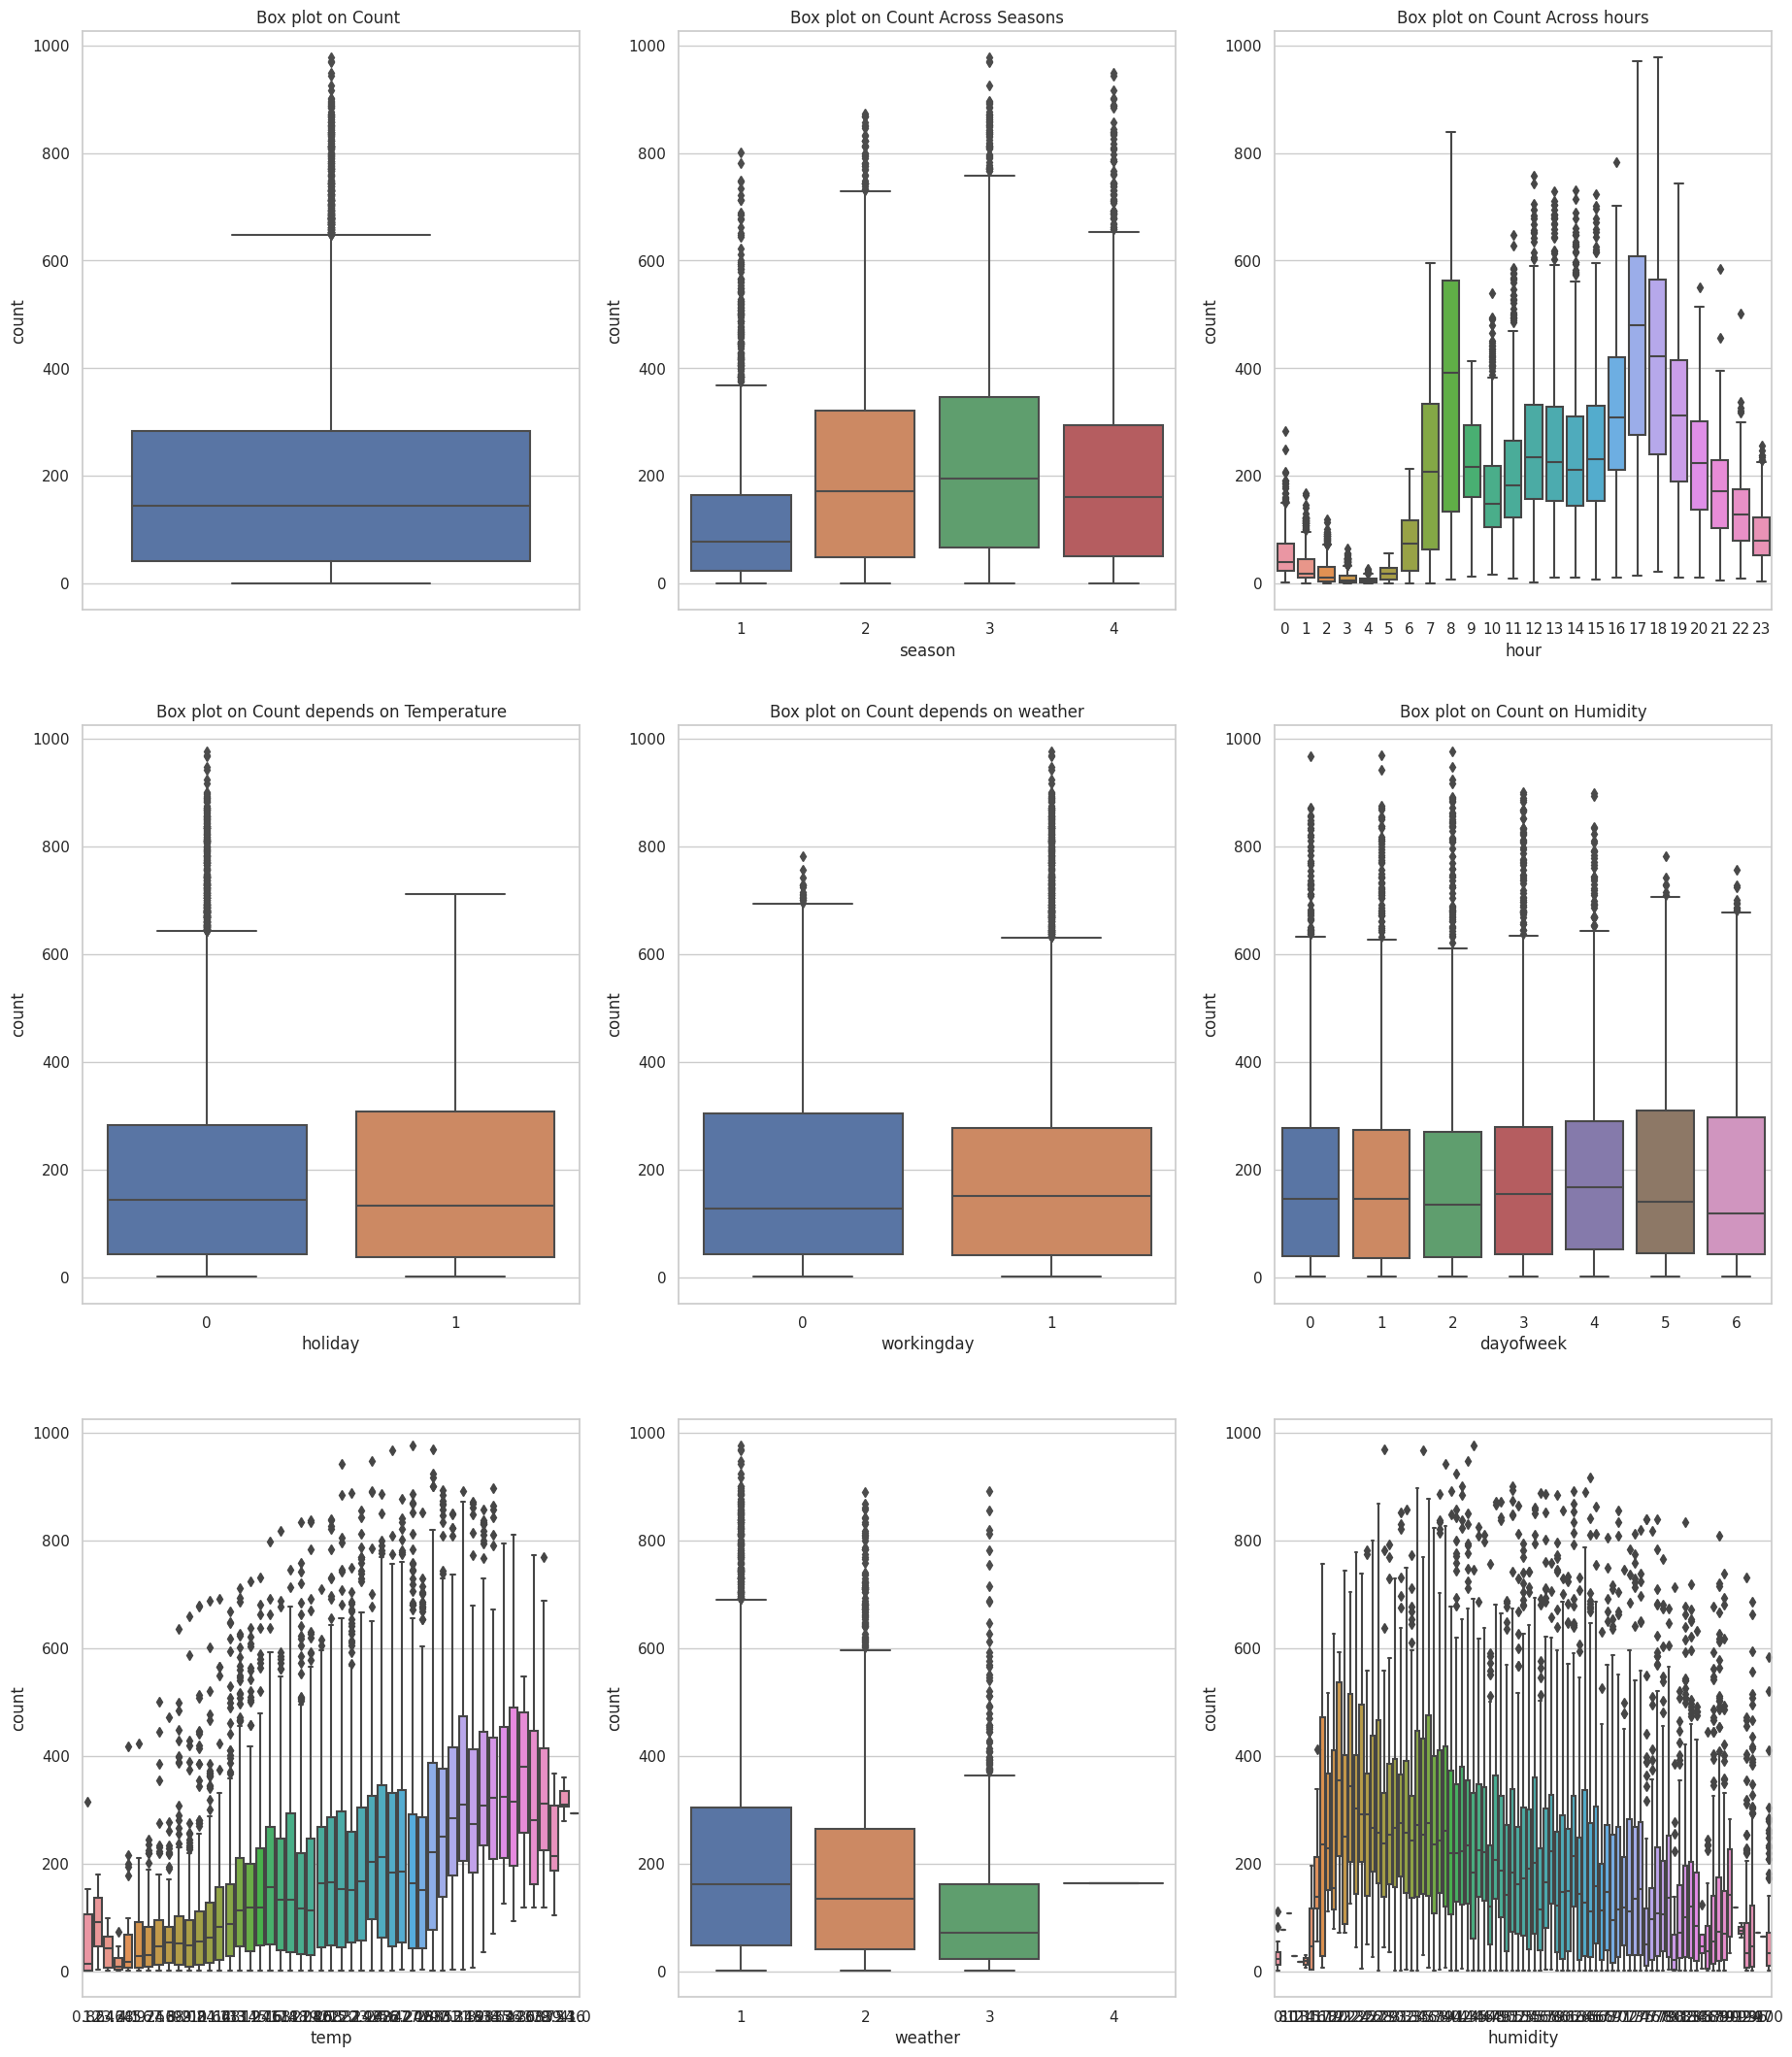

In [105]:
fig, ax = plt.subplots(3, 3, figsize=(20, 25))

sns.boxplot(y=df["count"],ax=ax[0][0])
ax[0][0].set_title("Box plot on Count ")

sns.boxplot(x="season",y="count",data=df,ax=ax[0][1])
ax[0][1].set_title("Box plot on Count Across Seasons")

sns.boxplot(x="hour",y="count",data=df,ax=ax[0][2])
ax[0][2].set_title("Box plot on Count Across hours")

sns.boxplot(x="holiday",y="count",data=df,ax=ax[1][0])
ax[1][0].set_title("Box plot on Count Across holidays")

sns.boxplot(x="workingday",y="count",data=df,ax=ax[1][1])
ax[1][1].set_title("Box plot on Count Across workingday")

sns.boxplot(x="dayofweek",y="count",data=df,ax=ax[1][2])
ax[1][2].set_title("Box plot on Count Across dayofweek")

sns.boxplot(x="temp",y="count",data=df,ax=ax[2][0])
ax[1][0].set_title("Box plot on Count depends on Temperature")

sns.boxplot(x="weather",y="count",data=df,ax=ax[2][1])
ax[1][1].set_title("Box plot on Count depends on weather")

sns.boxplot(x="humidity",y="count",data=df,ax=ax[2][2])
ax[1][2].set_title("Box plot on Count on Humidity")


<AxesSubplot: >

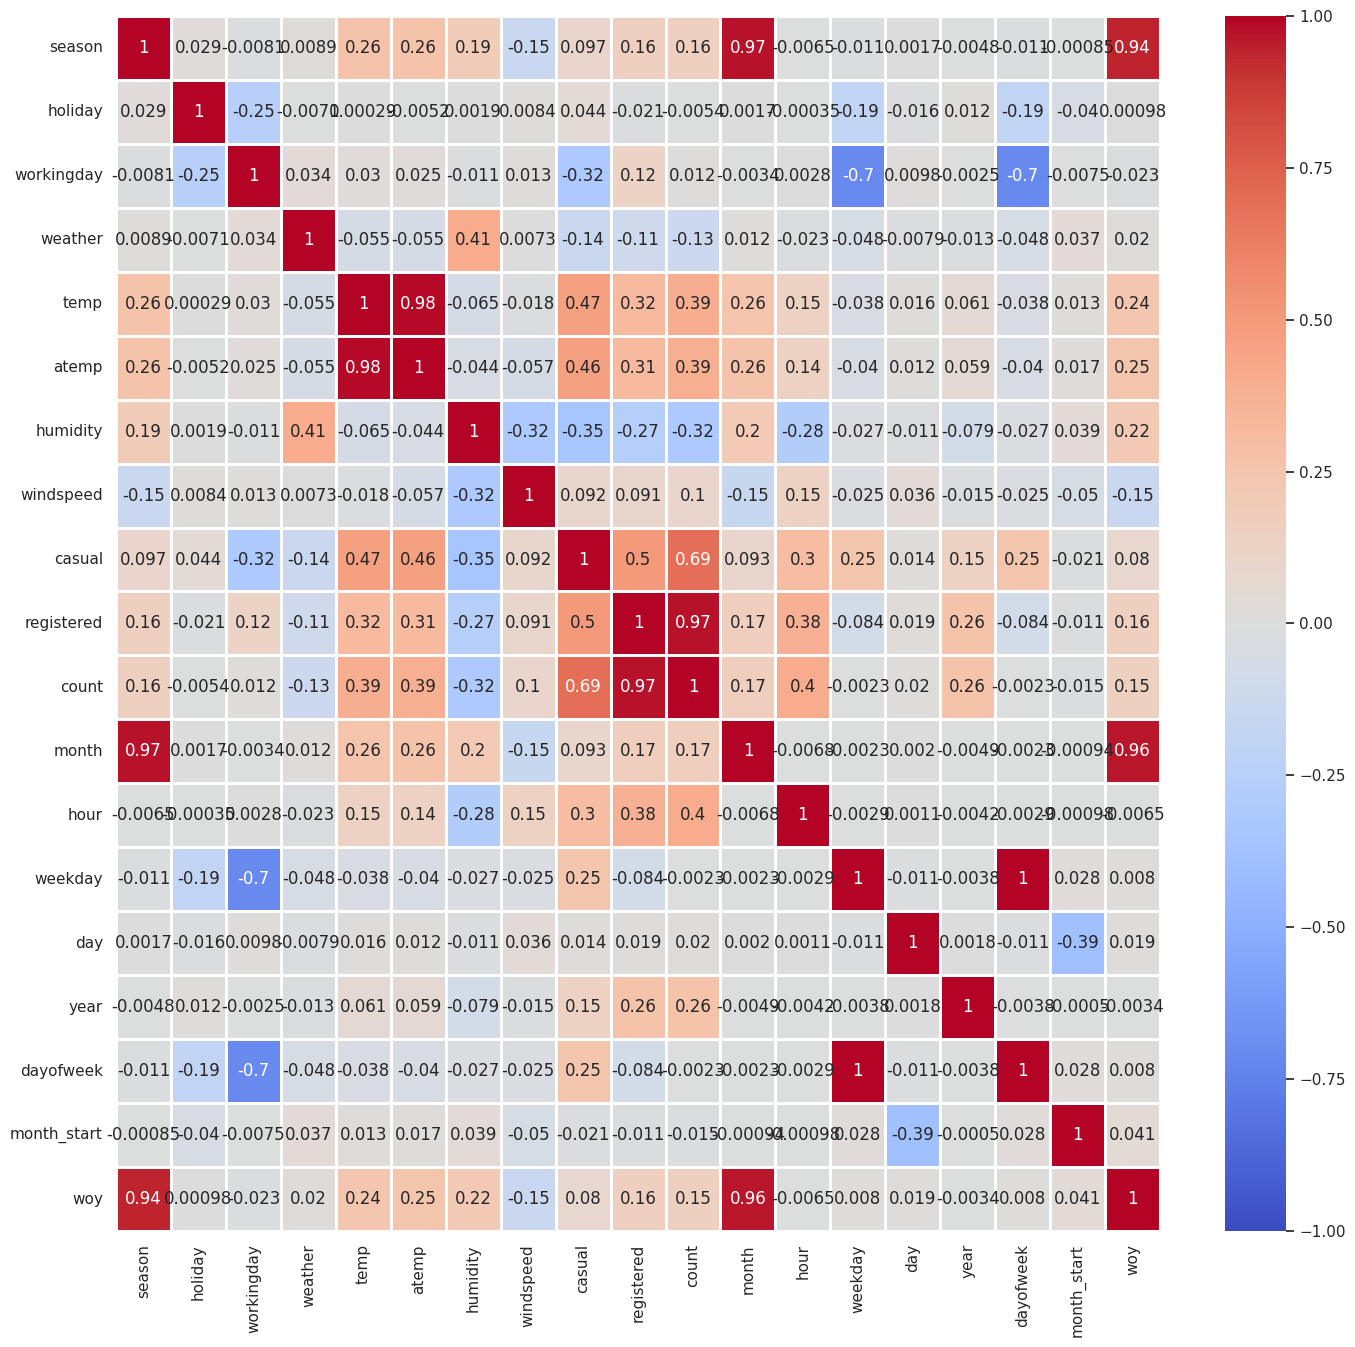

In [106]:

plt.figure(figsize=(15,15),dpi=100)
sns.heatmap(
    data=df.corr(),
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
)

In [107]:
df1corr = pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['count'],columns=['correlation to the target'])
df1corr.style.background_gradient(cmap=sns.light_palette('yellow',as_cmap=True))

,correlation to the target
count,1.000000
registered,0.970948
casual,0.690414
hour,0.400601
temp,0.394454
atemp,0.389784
year,0.260403
month,0.166862
season,0.163439
woy,0.152512


<AxesSubplot: xlabel='month', ylabel='count'>

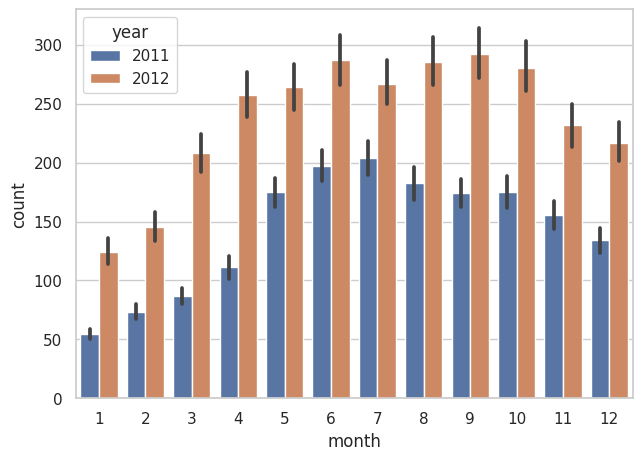

In [108]:
sns.barplot(data=df, x='month', y=df['count'], hue='year')


<AxesSubplot: xlabel='hour', ylabel='count'>

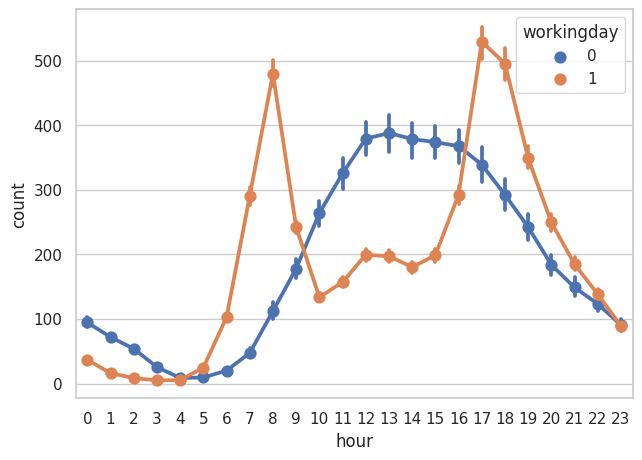

In [109]:

sns.pointplot(data=df, x='hour', y=df['count'], hue='workingday')


In [110]:
numerical_features = ["holiday","workingday","weather","temp","atemp", "humidity","windspeed", "month", 'day', 'season',  "hour", "dayofweek"]

categorical_features = []

features = numerical_features + categorical_features

target = 'count'

X,y = df[features],df[target]

In [111]:
X

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,season,hour,dayofweek
0,0,0,1,9.84,14.395,81,0.0000,1,1,1,0,5
1,0,0,1,9.02,13.635,80,0.0000,1,1,1,1,5
2,0,0,1,9.02,13.635,80,0.0000,1,1,1,2,5
3,0,0,1,9.84,14.395,75,0.0000,1,1,1,3,5
4,0,0,1,9.84,14.395,75,0.0000,1,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,12,19,4,19,2
10882,0,1,1,14.76,17.425,57,15.0013,12,19,4,20,2
10883,0,1,1,13.94,15.910,61,15.0013,12,19,4,21,2
10884,0,1,1,13.94,17.425,61,6.0032,12,19,4,22,2


In [112]:

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(Xtrain, ytrain)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(Xtrain, ytrain))
print("test score  :", lr.score(Xtest, ytest))



Coefficients: [-2.36820646  2.56788742 -2.19429184  1.58827284  4.88866712 -2.26480146
  0.34409853 10.12308358  0.31494835 -7.71141421  7.75424003  0.5955801 ]
Intercept   : 39.479022640599084
train score : 0.33899627111948405
test score  : 0.3338295340148193


In [113]:

print("MAE = %s" % mean_absolute_error(
    lr.predict(Xtest), ytest)
)

mse = mean_squared_error(lr.predict(Xtest), ytest)

print('MSE = %s' % mse)

print("r2_score = %s" % r2_score(lr.predict(Xtest), ytest))

MAE = 107.93144934771591
MSE = 21859.74438137035
r2_score = -0.9708713507167039


In [114]:
enet = ElasticNet(alpha=1000, l1_ratio=0.0001)
# обучаем модель на обучающей выборке
enet.fit(Xtrain, ytrain)
# делаем предсказания на тестовой выборке
y_pred = enet.predict(Xtest)
# оцениваем качество модели на тестовой выборке
score = enet.score(Xtest, ytest)
print(f"ElasticNet R^2 score: {score:.7f}")

ElasticNet R^2 score: 0.0925095


In [116]:
#models=[RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), SVR(), KNeighborsRegressor()]
#model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']




models=[RandomForestRegressor(), BaggingRegressor(), KNeighborsRegressor()]
model_names=['RandomForestRegressor', 'BaggingRegressor', 'KNeighborsRegressor()']
rmsle=[]
d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(Xtrain,ytrain)
    test_pred=clf.predict(Xtest)
    rmsle.append(np.sqrt(mean_squared_log_error(ytest, test_pred)))
    
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'Kernel',
  'BaggingRegressor',
  'KNeighborsRegressor()'],
 'RMSLE': [0.3981975802093797, 0.4090522207702713, 0.9607886744727656]}

In [121]:


#for  Bagging regresion.
no_of_test=[500]
params_dict={
    'n_estimators':no_of_test,
    'n_jobs':[-1],
}
clf_rf=GridSearchCV(estimator=BaggingRegressor(),  param_grid=params_dict, scoring='neg_mean_squared_log_error')
clf_rf.fit(Xtrain,ytrain)
pred=clf_rf.predict(Xtest)
print((np.sqrt(mean_squared_log_error(pred,ytest))))



0.39837697516272963


In [119]:
#for random forest regresion.
no_of_test=[500]
params_dict={
    'n_estimators':no_of_test,
    'n_jobs':[-1],
    'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),  param_grid=params_dict, scoring='neg_mean_squared_log_error')
clf_rf.fit(Xtrain,ytrain)
pred=clf_rf.predict(Xtest)
print((np.sqrt(mean_squared_log_error(pred,ytest))))

0.39880340443631807


In [122]:
data_test = {'datetime': ['2023-04-16 14:00:00'],
            'season': [2],
            'holiday': [0],
            'workingday': [0],
            'weather':[2],
            'temp': [15],
            'atemp': [15],	
            'humidity': [47],
            'windspeed': [2.99],
            }

Xtest_small = pd.DataFrame(data=data_test)
Xtest_small

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2023-04-16 14:00:00,2,0,0,2,15,15,47,2.99


In [123]:
Xtest_small1 = convert_date(Xtest_small)
Xtest_small1[numerical_features]

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,season,hour,dayofweek
0,0,0,2,15,15,47,2.99,4,16,2,14,6


In [124]:
pred=clf_rf.predict(Xtest_small1[numerical_features])
print(pred)

[253.374]


In [34]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline


In [35]:

for degree in [2, 3]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(Xtrain, ytrain)
    print("train score :", model.score(Xtrain, ytrain))
    y_poly = model.predict(Xtest)

    #print("Coefficients:", model.coef_)
    #print("Intercept   :", model.intercept_)
    print("test score  :", model.score(Xtest, y_poly))

train score : 0.5553732393096684
test score  : 1.0
train score : 0.6601613442210741
test score  : 1.0


In [ ]:

#from sklearn.ensemble import RandomForestRegressor
# Check the result according to "n_estimators".
#for i in (10, 20, 30, 40, 100, 150, 300):
 #   model = RandomForestRegressor(n_estimators= i, n_jobs= -1, random_state = 15)
 #   model.fit(Xtrain, ytrain)
 #   print('n_estimators=', i, ' train score:', model.score(Xtrain, ytrain))
 #   y_rf= model.predict(Xtest)

    #print("Coefficients:", model.coef_)
    #print("Intercept   :", model.intercept_)
 #   print("test score  :", model.score(Xtest, y_rf))

In [36]:
Xtrain

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,season,year,hour,dayofweek
2930,0,1,1,28.70,32.575,65,12.9980,7,11,3,2011,0,0
7669,0,1,1,22.96,26.515,52,22.0028,5,18,2,2012,22,4
1346,0,1,1,12.30,15.910,61,6.0032,4,1,2,2011,23,4
9432,0,0,1,23.78,27.275,60,8.9981,9,16,3,2012,9,6
453,0,1,3,8.20,9.850,93,12.9980,2,1,1,2011,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,1,6.56,8.335,47,11.0014,1,14,1,2012,2,5
5191,0,0,1,11.48,12.880,61,19.0012,12,10,4,2011,9,5
5390,0,0,1,11.48,13.635,48,16.9979,12,18,4,2011,16,6
860,0,0,1,15.58,19.695,17,35.0008,2,19,1,2011,7,5


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin


class DateImputer(BaseEstimator, TransformerMixin):
    """
    imputer for date-time columns
    """

    def __init__(self):
        print('\n>>>>>>>Date-time init() called.\n')

    def fit(self, X, y = None):
        print('\n>>>>>>>Date-time fit() called.\n')
        return self

    def transform(self, X, y = None):
        
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        
        X_ = convert_date(X_)
        print('\n>>>>>>>Date-time transform() called.\n', X_[features])
        return X_[features]


In [40]:
num_transformer = Pipeline(
    steps=[
        ('date_transfom', DateImputer()),
    ])

# column transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, test_features),
    ])



>>>>>>>Date-time init() called.



In [42]:



classifier_model = Pipeline(
    steps=[
       ('preprocessor', preprocessor),
       ('features', PolynomialFeatures(degree=3)),

       #('train1', LinearRegression()),
       ('train', ElasticNet(alpha=10, l1_ratio=0.01))
    ])


In [43]:
df = pd.read_csv('../data/train_bike.csv', parse_dates=True)

X,y = df[start_features], df[target]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
X

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [126]:
test_data = pd.read_csv('../data/test_bike.csv', parse_dates=True)
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
lin_reg = classifier_model.fit(Xtrain, ytrain)

In [49]:
result1 = lin_reg.predict(Xtest_small)
print(result1)


>>>>>>>Date-time transform() called.
    holiday  workingday  weather  temp  atemp  humidity  windspeed  month  day  \
0        0           0        2    15     15        47       2.99      4   16   

   season  year  hour  dayofweek  
0       2  2023    14          6  
[1224.70198487]


In [51]:
# Predict
result = lin_reg.predict(test_data)
result




>>>>>>>Date-time transform() called.
       holiday  workingday  weather   temp   atemp  humidity  windspeed  month  \
0           0           1        1  10.66  11.365        56    26.0027      1   
1           0           1        1  10.66  13.635        56     0.0000      1   
2           0           1        1  10.66  13.635        56     0.0000      1   
3           0           1        1  10.66  12.880        56    11.0014      1   
4           0           1        1  10.66  12.880        56    11.0014      1   
...       ...         ...      ...    ...     ...       ...        ...    ...   
6488        0           1        2  10.66  12.880        60    11.0014     12   
6489        0           1        2  10.66  12.880        60    11.0014     12   
6490        0           1        1  10.66  12.880        60    11.0014     12   
6491        0           1        1  10.66  13.635        56     8.9981     12   
6492        0           1        1  10.66  13.635        65     8.9981

array([-21.08522743, -76.05148559, -70.28276649, ...,  61.31732085,
       -19.71631429, -90.40305207])

In [127]:
Xtest_d = convert_date(test_data)
Xtest_small1[numerical_features]
pred=clf_rf.predict(Xtest_d[numerical_features])
print(pred)

[ 17.484   7.008   5.88  ... 105.468  92.542  59.476]


In [128]:
prediction = pd.DataFrame(pred.ravel(), columns=["count"])
prediction = pd.concat([test_data["datetime"], prediction], axis=1)

#prediction['count'] = prediction['count'].apply(lambda x: 0 if isinstance(x, (int, float)) and x < 0 else x)
prediction.head(20)

,datetime,count
0,2011-01-20 00:00:00,17.484
1,2011-01-20 01:00:00,7.008
2,2011-01-20 02:00:00,5.880
3,2011-01-20 03:00:00,3.664
4,2011-01-20 04:00:00,2.974
5,2011-01-20 05:00:00,15.968
6,2011-01-20 06:00:00,56.976
7,2011-01-20 07:00:00,216.754
8,2011-01-20 08:00:00,309.392
9,2011-01-20 09:00:00,191.580


In [94]:
prediction.to_csv("../data/prediction_bike.csv", index=False) 